In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from genetic_program import FitnessFunction
from gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript
from chart_plotter import DogeDNACanvas

%matplotlib inline
pd.set_option('display.max_columns', 500)

# you can define custom fitness functions here and add them to the JSON below
class WowFitnessFunction(FitnessFunction):
    _name = "ff_sowow"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent * evaluation.num_sells,

    
experiment_json = {
    "training_data": [
        {
        "transaction_currency": "BTC",
        "counter_currency": "USDT",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "DOGE",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/06/01 00:00:00 UTC",
        "end_time": "2018/08/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        }
    ],

    "validation_data": [{
        "transaction_currency": "ETH",
        "counter_currency": "BTC",
        "start_time": "2018/06/01 00:00:00 UTC",
        "end_time": "2018/08/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
    }],

    "fitness_functions": ["ff_benchmarkdiff", "ff_v1", "ff_benchmarkdiff_trades", "ff_benchlenctrl"],
    "grammar_version": "gv3",
    "num_generations": 10,

    "mating_probabilities": [
        0.9
    ],

    "mutation_probabilities": [
        0.5
    ],

    "population_sizes": [
        500
    ]
}

e = ExperimentManager(experiment_json, read_from_file=False)
e.run_experiments(display_results=False)


INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...
INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_v1;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...
INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff_trades;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...
INFO:root:>>> Variant run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchlenctrl;x_0.9;m_0.5;n_500;gen_10 already has completed records, skipping...


### Looking at performance per training dataset and across all experiment variants
For each training dataset in the training collection, we get a performance dataframe sorted by profit. The dataframes and best individuals in them are shown below.

Experiment id: run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10



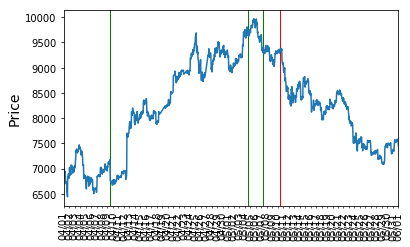

String representation:
if_then_else(gt(ema200(ARG0), ema50(ARG0)), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 87.68591911278607), if_then_else(False, buy, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 5.204650283648808), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(False, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(91.65447368067163, ema50(ARG0)), if_then_else(lt(72.65096031503073, 15.492839530224595), if_then_else(True, buy, sell), if_then_else(True, buy, buy)), if_then_else(identity_bool(False), if_then_else(Tru

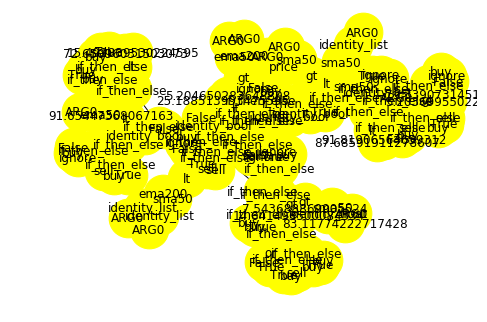

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 11:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.140890 BTC 	 (1 BTC = 7080.00000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 11:00:00 rsi_value=None
2018-05-04 14:02:00  	 OrderType.SELL   	 cash_balance ->       1369.14 USDT 	 currency_balance ->     -0.140890 BTC 	 (1 BTC = 9742.19299917 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-04 14:02:00 rsi_value=None
2018-05-04 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1369.14 USDT 	 currency_balance ->      0.141652 BTC 	 (1 BTC = 9641.36998356 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-04 15:00:00 rsi_value=None
2018-05-07 09:00:00  	 OrderType.SELL   	 cash_balance ->       1313.3

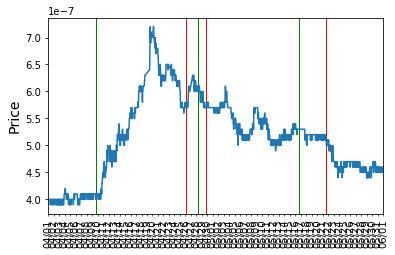

String representation:
if_then_else(gt(ema200(identity_list(identity_list(ARG0))), sma200(identity_list(identity_list(ARG0)))), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 71.17395197374101), if_then_else(False, ignore, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 13.955523994837842), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(True, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(rsi(ARG0), ema50(ARG0)), ignore, if_then_else(identity_bool(False), if_then_else(True, buy, sell), if_then_else(False, ignore, buy))), if_

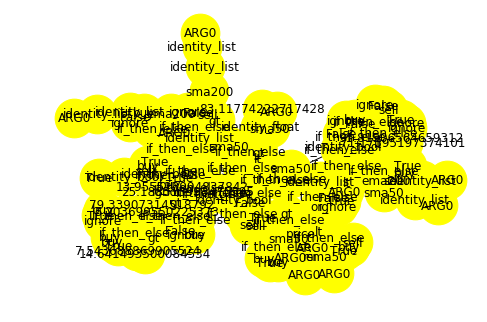

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 19:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 2493750000.000000 DOGE 	 (1 DOGE = 0.00000040 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 19:00:00 rsi_value=None
2018-04-26 03:00:00  	 OrderType.SELL   	 cash_balance ->       1417.88 BTC 	 currency_balance -> -2493750000.000000 DOGE 	 (1 DOGE = 0.00000057 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-26 03:00:00 rsi_value=None
2018-04-28 09:00:00  	 OrderType.BUY    	 cash_balance ->      -1417.88 BTC 	 currency_balance -> 2357231994.140626 DOGE 	 (1 DOGE = 0.00000060 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-28 09:00:00 rsi_value=None
2018-04-29 16:00:00  	 OrderType.SELL   	 cash_balance ->       134

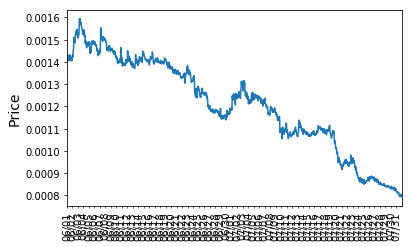

String representation:
if_then_else(False, sell, ignore)



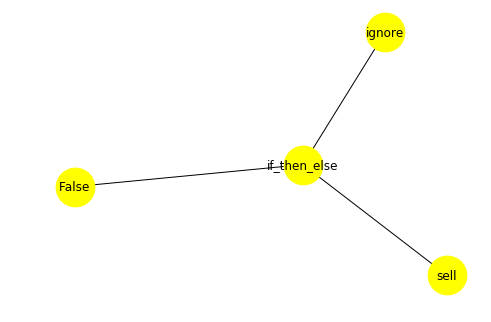

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
End time: 2018-08-01 00:00:00

Summary
--
Number of trades: 0
End cash: 1000.00 BTC
End crypto: 0.000000 OMG
End price: 0.00079397
Total value invested: 1000 BTC
Total value after investment: 1000.00 BTC (+0.00%)
Profit: 0.00 BTC
Total value invested: 7485000.00 USDT (conversion on 2018-06-01 00:00:00)
Total value after investment: 7748319.58 USDT (+3.52%) (conversion on 2018-08-01 00:00:00)
Profit: 263319.58 USDT

Additional stats:
  Max drawdown: 0.0
  Max drawdown duration: 0.0
  Sharpe ratio: nan
  Alpha: 0.0
  Beta: 0.0
  Buy-sell pair gains - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair losses - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Buy-sell pair returns - overall stats
     min = nan, max = nan, mean = nan, stdev = nan
  Total buy-sell pairs: 0
  Total profitable trades: 0
  Percent pro

In [2]:
performance_dfs = e.get_joined_performance_dfs_over_all_variants()

We can explore each of the performance dataframes in more detail.

In [3]:
performance_dfs[1]

,abc_negative_cache_version,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
0,54,0.035345,11.634848,24.286563,0.456713,DOGE,1283.246836,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1283.246836,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1283.246836,9.605103e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,0,[<deap.gp.Primitive object at 0x00000213FED4B6...,0.421438,-0.040142,0.421438,-0.297556,2462400.0,0.421438,-0.046258,0.109640,0.421438,-0.052375,-0.052375,3,3,1,2,6,1,3,6,2,0.333333,283.246836,28.324684,38.802060,2.685103e+06,60,0.351381,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.006117,0.220530,0,0.0025,DOGE,False
6,54,0.034875,11.634848,24.286563,0.414763,DOGE,1273.912135,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1273.912135,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1273.912135,9.535232e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,6,[<deap.gp.Primitive object at 0x00000213FED4B6...,0.386768,-0.035750,0.386768,-0.272760,2448000.0,0.386768,-0.037946,0.103626,0.386768,-0.040142,-0.040142,3,3,1,2,6,1,3,6,2,0.333333,273.912135,27.391214,37.792375,2.615232e+06,60,0.352478,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.002196,0.200220,0,0.0025,DOGE,False
7,54,0.034875,11.634848,24.286563,0.414763,DOGE,1273.912135,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1273.912135,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1273.912135,9.535232e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,7,[<deap.gp.Primitive object at 0x00000213FED4B6...,0.386768,-0.035750,0.386768,-0.272760,2448000.0,0.386768,-0.037946,0.103626,0.386768,-0.040142,-0.040142,3,3,1,2,6,1,3,6,2,0.333333,273.912135,27.391214,37.792375,2.615232e+06,60,0.352478,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.002196,0.200220,0,0.0025,DOGE,False
8,54,0.034875,11.634848,24.286563,0.414763,DOGE,1273.912135,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1273.912135,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1273.912135,9.535232e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,8,[<deap.gp.Primitive object at 0x00000213FED4B6...,0.386768,-0.035750,0.386768,-0.272760,2448000.0,0.386768,-0.037946,0.103626,0.386768,-0.040142,-0.040142,3,3,1,2,6,1,3,6,2,0.333333,273.912135,27.391214,37.792375,2.615232e+06,60,0.352478,0,0,1000,0,1.522541e+09,1000,6920000.0,0.000000,0.002196,0.200220,0,0.0025,DOGE,False
9,54,0.034875,11.634848,24.286563,0.414763,DOGE,1273.912135,BTC,0.000000e+00,4.600000e-07,1.527811e+09,1273.912135,0.000000e+00,DOGE,4.600000e-07,1.527811e+09,1273.912135,9.535232e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,9,[<deap.gp.Primitive object at 0x00000213FED4B6...,0.386768,-0.035750,0.386768,-0.272760,2448000.0,0.386768,-0.037946,0.103626,0.386768,-0.040142,-0.040142,3,3,1,2,6,1,3,6,2,0.333333,273.912135,27.391214,37.792375,2.6

Experiment id: run_evolution.data_BTC-USDT-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-OMG-BTC-1527811200.0-1533081600.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_10



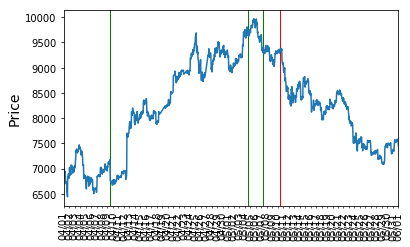

String representation:
if_then_else(gt(ema200(ARG0), ema50(ARG0)), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 87.68591911278607), if_then_else(False, buy, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 5.204650283648808), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(False, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(91.65447368067163, ema50(ARG0)), if_then_else(lt(72.65096031503073, 15.492839530224595), if_then_else(True, buy, sell), if_then_else(True, buy, buy)), if_then_else(identity_bool(False), if_then_else(Tru

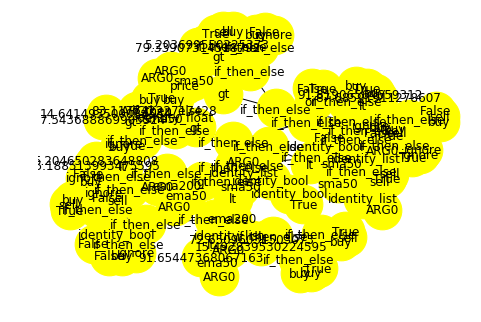

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 11:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.140890 BTC 	 (1 BTC = 7080.00000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 11:00:00 rsi_value=None
2018-05-04 14:02:00  	 OrderType.SELL   	 cash_balance ->       1369.14 USDT 	 currency_balance ->     -0.140890 BTC 	 (1 BTC = 9742.19299917 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-04 14:02:00 rsi_value=None
2018-05-04 15:00:00  	 OrderType.BUY    	 cash_balance ->      -1369.14 USDT 	 currency_balance ->      0.141652 BTC 	 (1 BTC = 9641.36998356 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-04 15:00:00 rsi_value=None
2018-05-07 09:00:00  	 OrderType.SELL   	 cash_balance ->       1313.3

In [4]:
e.performance_df_row_info(performance_dfs[0].iloc[0])

### Best performing individuals across all variants and datasets
Each experiment variant will have a winner, the doge baby that had the best fitness value. We can get these winners by invoking the command below:

In [5]:
best_individuals_across_variants_and_datasets = e.get_best_performing_across_variants_and_datasets(e.training_data)

In [6]:
best_individuals_across_variants_and_datasets



,experiment_name,doge,fitness_function,fitness_value,mean_profit,std_profit,max_profit,min_profit,variant,evaluations,individual,all_profits
0,run_evolution.data_BTC-USDT-1522540800.0-15278...,if_then_else(gt(ema200(identity_list(identity_...,ff_benchmarkdiff,11.487737,14.438855,12.115238,28.324684,-1.196372,Experiment run_evolution.data_BTC-USDT-1522540...,[<backtester_ticks.TickDrivenBacktester object...,[<deap.gp.Primitive object at 0x00000213832889...,"16.188253850765, 28.324683645679897, -1.196372..."
2,run_evolution.data_BTC-USDT-1522540800.0-15278...,"if_then_else(False, sell, ignore)",ff_benchmarkdiff_trades,-0.000000,0.000000,0.000000,0.000000,0.000000,Experiment run_evolution.data_BTC-USDT-1522540...,[<backtester_ticks.TickDrivenBacktester object...,[<deap.gp.Primitive object at 0x00000213832460...,"0.0, 0.0, 0.0"
3,run_evolution.data_BTC-USDT-1522540800.0-15278...,"if_then_else(False, buy, buy)",ff_benchlenctrl,19.670782,-9.983642,25.825478,11.634848,-46.286291,Experiment run_evolution.data_BTC-USDT-1522540...,[<backtester_ticks.TickDrivenBacktester object...,[<deap.gp.Primitive object at 0x00000213832463...,"4.700516419491555, 11.634847560975619, -46.286..."
1,run_evolution.data_BTC-USDT-1522540800.0-15278...,"if_then_else(lt(price(ARG0), ema50(ARG0)), sel...",ff_v1,203.321926,-52.823450,31.721408,-11.019638,-87.821545,Experiment run_evolution.data_BTC-USDT-1522540...,[<backtester_ticks.TickDrivenBacktester object...,[<deap.gp.Primitive object at 0x000002138317F7...,"-11.019637687150055, -87.82154541159021, -59.6..."


### How did this individual perform on training sets?

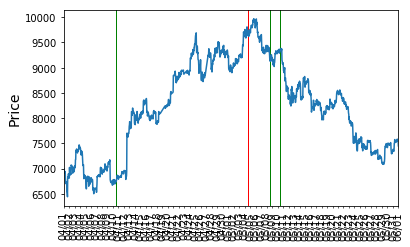

String representation:
if_then_else(gt(ema200(identity_list(identity_list(ARG0))), sma200(identity_list(identity_list(ARG0)))), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 71.17395197374101), if_then_else(False, ignore, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 13.955523994837842), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(True, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(rsi(ARG0), ema50(ARG0)), ignore, if_then_else(identity_bool(False), if_then_else(True, buy, sell), if_then_else(False, ignore, buy))), if_

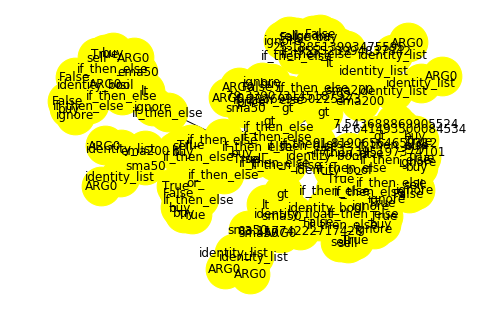

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-10 13:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.148111 BTC 	 (1 BTC = 6734.83456698 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-10 13:00:00 rsi_value=None
2018-05-04 14:02:00  	 OrderType.SELL   	 cash_balance ->       1439.31 USDT 	 currency_balance ->     -0.148111 BTC 	 (1 BTC = 9742.19299917 USDT ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-04 14:02:00 rsi_value=None
2018-05-08 14:00:00  	 OrderType.BUY    	 cash_balance ->      -1439.31 USDT 	 currency_balance ->      0.157166 BTC 	 (1 BTC = 9135.00000000 USDT ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-08 14:00:00 rsi_value=None
2018-05-10 11:02:00  	 OrderType.SELL   	 cash_balance ->       1468.5

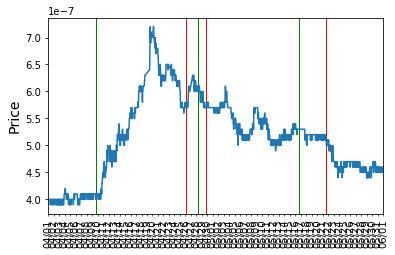

String representation:
if_then_else(gt(ema200(identity_list(identity_list(ARG0))), sma200(identity_list(identity_list(ARG0)))), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 71.17395197374101), if_then_else(False, ignore, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 13.955523994837842), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(True, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(rsi(ARG0), ema50(ARG0)), ignore, if_then_else(identity_bool(False), if_then_else(True, buy, sell), if_then_else(False, ignore, buy))), if_

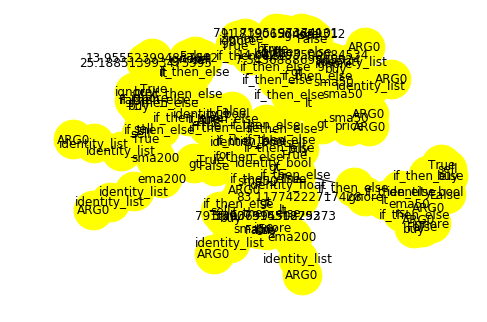

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 19:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 2493750000.000000 DOGE 	 (1 DOGE = 0.00000040 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 19:00:00 rsi_value=None
2018-04-26 03:00:00  	 OrderType.SELL   	 cash_balance ->       1417.88 BTC 	 currency_balance -> -2493750000.000000 DOGE 	 (1 DOGE = 0.00000057 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-26 03:00:00 rsi_value=None
2018-04-28 09:00:00  	 OrderType.BUY    	 cash_balance ->      -1417.88 BTC 	 currency_balance -> 2357231994.140626 DOGE 	 (1 DOGE = 0.00000060 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-28 09:00:00 rsi_value=None
2018-04-29 16:00:00  	 OrderType.SELL   	 cash_balance ->       134

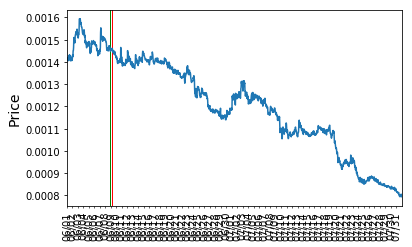

String representation:
if_then_else(gt(ema200(identity_list(identity_list(ARG0))), sma200(identity_list(identity_list(ARG0)))), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 71.17395197374101), if_then_else(False, ignore, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 13.955523994837842), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(True, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(rsi(ARG0), ema50(ARG0)), ignore, if_then_else(identity_bool(False), if_then_else(True, buy, sell), if_then_else(False, ignore, buy))), if_

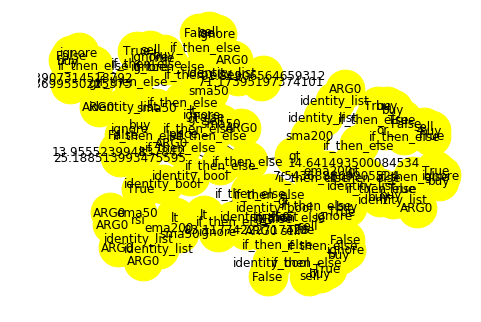

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-08 20:07:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 681701.691440 OMG 	 (1 OMG = 0.00146325 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-08 20:07:00 rsi_value=None
2018-06-09 07:03:00  	 OrderType.SELL   	 cash_balance ->        988.04 BTC 	 currency_balance -> -681701.691440 OMG 	 (1 OMG = 0.00145300 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-06-09 07:03:00 rsi_value=None
End time: 2018-08-01 00:00:00

Summary
--
Number of trades: 2
End cash: 988.04 BTC
End crypto: 0.000000 OMG
End price: 0.00079397
Total value invested: 1000 BTC
Total value after investment: 988.04 BTC (-1.20%)
Profit: -11.96 BTC
Total value invested: 7485000.00 USDT (conversion on 2018-06-01 00:00:00)
Total value after investment: 7655620.83 

In [12]:
best_overall = best_individuals_across_variants_and_datasets.iloc[0]
evaluations = best_overall.evaluations
for evaluation in evaluations:
    e._print_individual_info(best_overall.individual, evaluation)

### Let's see its performance on the validation set...

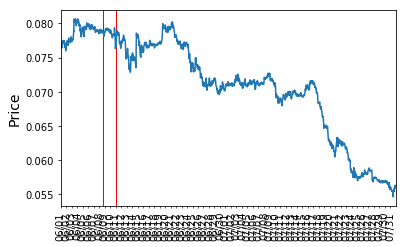

String representation:
if_then_else(gt(ema200(identity_list(identity_list(ARG0))), sma200(identity_list(identity_list(ARG0)))), if_then_else(lt(sma50(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(gt(price(ARG0), sma50(ARG0)), if_then_else(gt(5.203699550225373, 79.33907314518792), if_then_else(False, buy, ignore), if_then_else(True, sell, buy)), if_then_else(lt(91.81906564659312, 71.17395197374101), if_then_else(False, ignore, sell), if_then_else(True, ignore, ignore))), if_then_else(identity_bool(identity_bool(True)), if_then_else(lt(25.188513993475595, 13.955523994837842), if_then_else(False, ignore, buy), if_then_else(False, sell, ignore)), if_then_else(identity_bool(False), if_then_else(True, ignore, buy), if_then_else(True, sell, sell)))), if_then_else(lt(ema200(identity_list(ARG0)), sma50(identity_list(ARG0))), if_then_else(lt(rsi(ARG0), ema50(ARG0)), ignore, if_then_else(identity_bool(False), if_then_else(True, buy, sell), if_then_else(False, ignore, buy))), if_

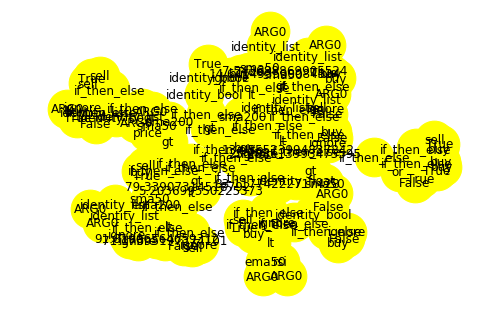

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-06-01 00:00:00
--
--
2018-06-08 16:03:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance ->  12669.929475 ETH 	 (1 ETH = 0.07872972 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-06-08 16:03:00 rsi_value=None
2018-06-11 03:01:00  	 OrderType.SELL   	 cash_balance ->        975.84 BTC 	 currency_balance -> -12669.929475 ETH 	 (1 ETH = 0.07721345 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-06-11 03:01:00 rsi_value=None
End time: 2018-08-01 00:00:00

Summary
--
Number of trades: 2
End cash: 975.84 BTC
End crypto: 0.000000 ETH
End price: 0.05591001
Total value invested: 1000 BTC
Total value after investment: 975.84 BTC (-2.42%)
Profit: -24.16 BTC
Total value invested: 7485000.00 USDT (conversion on 2018-06-01 00:00:00)
Total value after investment: 7561145.31 U

In [13]:
evaluation = e._build_evaluation_object(best_overall.individual, best_overall.variant, e.validation_data[0])
e._print_individual_info(best_overall.individual, evaluation)

In [14]:
perf = e.evaluate_individual_on_data_collection(best_overall.individual, best_overall.variant, e.training_data)
perf

,abc_negative_cache_version,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
0,54.0,0.019630,4.700516,4.700516,0.921380,BTC,0.000000,USDT,0.156348,7.450000e+03,1.527811e+09,0.000000,0.156348,BTC,7.450000e+03,1.527811e+09,1161.882539,1.170267e+03,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,[<deap.gp.Primitive object at 0x00000213832889...,0.442921,NaN,0.442921,-0.247378,1648800.0,0.232877,NaN,0.232877,0.022833,NaN,0.022833,2.0,3.0,2.0,0.0,5.0,2.0,2.0,5.0,0.0,1.000000,161.882539,16.188254,17.026671,1.702667e+02,60.0,0.303254,0.0,0.0,1000.0,0.0,1.522541e+09,1000.0,1000.0,0.210044,NaN,0.210044,0.0,0.0025,BTC,0.0
1,54.0,0.035345,11.634848,24.286563,0.456713,DOGE,1283.246836,BTC,0.000000,4.600000e-07,1.527811e+09,1283.246836,0.000000,DOGE,4.600000e-07,1.527811e+09,1283.246836,9.605103e+06,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,[<deap.gp.Primitive object at 0x00000213832889...,0.421438,-0.040142,0.421438,-0.297556,2462400.0,0.421438,-0.046258,0.109640,0.421438,-0.052375,-0.052375,3.0,3.0,1.0,2.0,6.0,1.0,3.0,6.0,2.0,0.333333,283.246836,28.324684,38.802060,2.685103e+06,60.0,0.351381,0.0,0.0,1000.0,0.0,1.522541e+09,1000.0,6920000.0,0.000000,0.006117,0.220530,0.0,0.0025,DOGE,0.0
2,54.0,-0.001776,-46.286291,-45.869559,0.002834,OMG,988.036276,BTC,0.000000,7.939700e-04,1.533078e+09,988.036276,0.000000,OMG,7.939700e-04,1.533082e+09,988.036276,7.655621e+06,1.0,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_BTC-USDT-1522540800.0-15278...,None,[<deap.gp.Primitive object at 0x00000213832889...,NaN,-0.009487,-0.009487,-0.012255,679560.0,NaN,-0.009487,-0.009487,NaN,-0.009487,-0.009487,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,0.000000,-11.963724,-1.196372,2.279503,1.706208e+05,60.0,-0.293029,0.0,0.0,1000.0,0.0,1.527811e+09,1000.0,7485000.0,NaN,0.000000,0.000000,0.0,0.0025,OMG,0.0


In [15]:
doge = DogeDNACanvas(best_overall.individual,"container")
HTML(doge.create_container())

In [16]:
Javascript(doge.show())

<IPython.core.display.Javascript object>

### Random thoughts
* perhaps a great doge baby would be found in more generations
* when the market is bearish, some top performing strategies produce no trades (bug or feature?)
* in bullish markets, we see babies that sell and then buy again immediately - unrealistic
* keep reseeding initial population until some individual with good fitness is found 
* alternative: seed initial population with good individuals (e.g. RSI strategy, etc.) 
* compress babies by evaluating expressions within them (for instance 'if False')
* overfitting should be solved by evaluating babies over different time periods / currencies?
